# Binary Search Tree. HW 5.4

Last Updated: June 10, 2022

**INSTRUCTIONS**

Below is code for a Binary Search Tree Class. Seven of the methods in this implementation are incomplete (vacuous): `find`, `size`, `preorder`, `inorder`, `postorder`, \_\_str\_\_ and `height`. It is your task to complete them. Use the testing code to test and confirm your implementation. Submit the completed notebook file (BOTH the .ipynb and a rendered .html).

**Note:** Finding the height of a binary tree is a common tech interview question.

**POINT VALUES: (TOTAL=10)**  

| method| points |
| :----| ---- |
| find | 2   |
| size | 1   |
| inorder | 2   |
| preorder | 1   |
| postorder | 1   |
| str | 2   |
| height | 1  |

---

**ABOUT THE CLASSES**

The `Node` class describes the structure of a node in the tree: each node has a data item and can have a left and right child. 

The `BinarySearchTree` class is responsible for tree-level methods such as `buildBST`, inserting a data value in the right place/node in the BST tree (we populate the tree given a list data values through main), and the tree traversal methods.

---

In [27]:
# -*- coding: utf-8 -*-
'''
Binary Search Tree
Plus tree traversal methods 

NOTE: I placed return statements immediately after the function declarations so 
you can run the code and see the print statments before beginning the assignment. 
HOWEVER ... You will need to move the return statements to the end of the functions
once you complete each function implementation :)
'''
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, data): # Constructor of Node class
        # A node has a data value, a left child node and a right child node
        self.data = data  #data item
        self.left = None  #left child, initially empty
        self.right = None #right child, initially empty

    def __str__(self): # Printing a node
        return str(self.data) #return as string

# ===================================================================
# ===================================================================

class BinarySearchTree:
    def __init__(self): # Constructor of BinarySearchTree class
        self.root = None  # Initially, an empty root node
        self.G = nx.DiGraph()

# ===================================================================
    def buildBST(self, val):  # Build ("create") a binary search tree 
        if self.root == None:
            self.root = Node(val)
        else:
            current = self.root
            while 1:
                if val < current.data:
                    if current.left:
                        current = current.left  # Go left...
                    else:
                        current.left = Node(val)  # Left child is empty; place value here
                        break;   
                elif val > current.data:
                    if current.right:
                        current = current.right  # Go right...
                    else:
                        current.right = Node(val)  # Right child is empty; place value here
                        break;      
                else:             
                    break 
                    
# ===================================================================
    def _find_recursive(self, node, target):
        if node is None:
            return False
        if target == node.data:
            return True
        if target < node.data:
            return self._find_recursive(node.left, target)
        if target > node.data:
            return self._find_recursive(node.right, target)
      
    def find(self, target): # Find a node with the 'target' value in the BST
        '''
        returns true if found, false otherwise
        '''
        return self._find_recursive(self.root, target)

# ===================================================================
    def _size_recursive(self, node):
        if node is None:
            return 0
        return 1 + self._size_recursive(node.left) + self._size_recursive(node.right)
        
    def size(self, node): # Counts the number of nodes in the BST
        '''
        returns number of nodes
        '''
        return self._size_recursive(self.root)

# ===================================================================
    def _inorder_recursive(self, node):
        if node is None:
            return
        self._inorder_recursive(node.left)
        print(node.data)
        self._inorder_recursive(node.right)
        
    def inorder(self, node): # Performing in-order tree traversal
        '''
        prints values as encountered inorder
        '''       
        return self._inorder_recursive(self.root)

# ===================================================================
    def _preorder_recursive(self, node):
        # Base case: If the node is None, return (do nothing)
        if node is None:
            return
        print(node.data)
        self._preorder_recursive(node.left)
        self._preorder_recursive(node.right)
        
    def preorder(self, node):  # Performing pre-order tree traversal
        '''
        prints values as encountered preorder
        '''
        return self._preorder_recursive(self.root)

# ===================================================================
    def _postorder_recursive(self, node):
        if node is None:
            return
        self._postorder_recursive(node.left)
        self._postorder_recursive(node.right)
        print(node.data)
        
    def postorder(self, node): # Performing post-order tree traversal
        '''
        prints values as encountered postorder
        '''            
        return self._postorder_recursive(self.root)

# ===================================================================
    def _build_graph_recursive(self, node):
        if node:
            self.G.add_node(node.data)  
        if node.left:
            self.G.add_edge(node.data, node.left.data)  
            self._build_graph_recursive(node.left)
        if node.right:
            self.G.add_edge(node.data, node.right.data)  
            self._build_graph_recursive(node.right)

    def build_graph(self):
        self._build_graph_recursive(self.root)
                
    def __str__(self):  
        '''
        Builds networkx visualization of the BST
    
        The purpose of this method is to render a visualization of a constructed BST
        Tree to confirm correctness. 
    
        Hint: To complete this you will need to create a node list, edge list, and/or 
        an adjacency matrix. You can then easily construct a graph visualization using networkx.
                
        Slightly alter one of your traversal methods (or the buildBST method) 
        above so that the appropriate structure(s) is constructed and saved as 
        an attribute(s) to the BST class, eg, edgeList.
    
        Hint: Use a directed graph (DiGraph) so you can more easily 
        identify the root, leaf, and internal nodes. The standard networkx method 
        draw will suffice. It will render the tree as a standard graph (ie no clear root),
        but you can determine which node is the root if you use a DiGraph. 
    
        Once the graph is constructed, a plot is created. 
        '''
        self.build_graph()  
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, with_labels=True, arrows=True, node_size=500, node_color='lightblue')
        plt.title("Binary Search Tree Visualization")
        plt.axis('off')
        plt.show()
             
# ===================================================================  
    def _height_recursive(self, node):
        # Base case: If the node is None, the height of the subtree is 0
        if node is None:
            return 0

        # Recursive case: Calculate the height of the left and right subtrees
        left_height = self._height_recursive(node.left)
        right_height = self._height_recursive(node.right)

        # The height of the current node is the maximum of the left and right subtree heights, plus 1 for the current node
        return max(left_height, right_height) + 1

    def height(self, node): # Performing post-order tree traversal
        '''
        prints tree height
        '''     
        return self._height_recursive(self.root)

What's the size of the tree?
9
What's the size of the tree?
0

In-order Tree Traversal:
1
3
4
6
7
8
10
13
14

Pre-order Tree Traversal:
8
3
1
6
4
7
10
14
13

Post-order Tree Traversal:
1
4
7
6
3
13
14
10
8

Find 7: True
Find 5: False
Find 30: False


Display Figure of Tree:


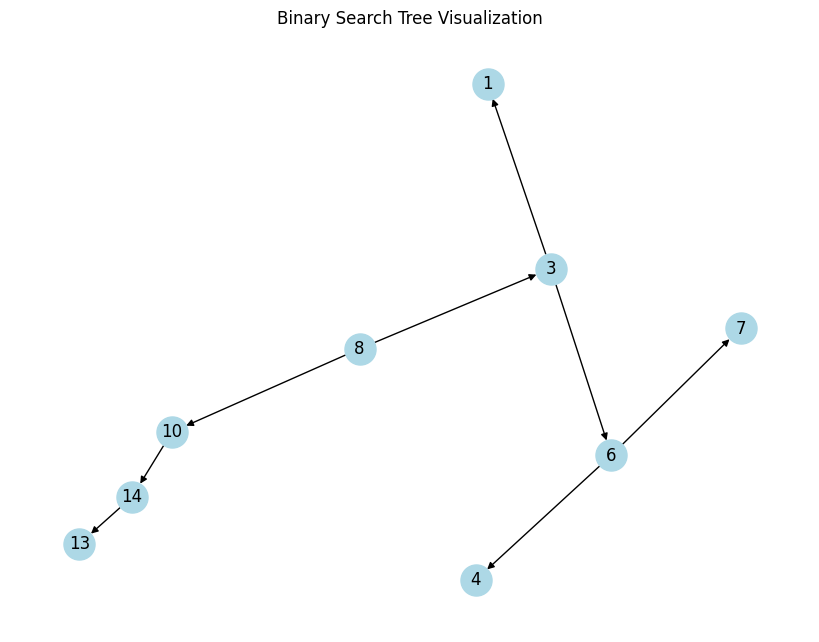

See Graph Diagram in Figure

Height of the Tree:
4


In [28]:
##################                  
## Testing Code ##
##################                        
                        
tree = BinarySearchTree()    
treeEmpty = BinarySearchTree()  # Empty tree

arr = [8,3,1,6,4,7,10,14,13]    # Array of nodes (data items)
for i in arr:                   # For each data item, build the Binary Search Tree
    tree.buildBST(i)

print('What\'s the size of the tree?')
print(tree.size(tree.root))     # size method

print('What\'s the size of the tree?')
print(treeEmpty.size(treeEmpty.root))

print("") 
print ('In-order Tree Traversal:')
tree.inorder(tree.root)         # Perform in-order tree traversal, and print
 
print("") 
print ('Pre-order Tree Traversal:')
tree.preorder(tree.root)        # Perform pre-order tree traversal, and print

print("")
print ('Post-order Tree Traversal:')
tree.postorder(tree.root)       # Perform post-order tree traversal, and print

print("")
print ('Find 7:', end=" ")      # find method
print(tree.find(7))

print('Find 5:', end=" ")
print(tree.find(5))

print('Find 30:', end=" ")
print(tree.find(30))

print("")
print("")
print ('Display Figure of Tree:')
print(tree) 

print("")
print('Height of the Tree:')
print(tree.height(tree.root))